In [14]:
import numpy as np
import matplotlib.pyplot as plt
#import torch

In [11]:
x = np.loadtxt("d:/datasets/uci/madelon/madelon_train.data")
y = np.loadtxt("d:/datasets/uci/madelon/madelon_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.data")
yt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(2000, 500) (2000,) (600, 500) (600,)


In [20]:
x = np.loadtxt("d:/datasets/uci/dexter/dexter_train.csv", delimiter=',')
y = np.loadtxt("d:/datasets/uci/dexter/dexter_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.csv", delimiter=',')
yt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(300, 20000) (300,) (300, 20000) (300,)


In [10]:
x = np.loadtxt("d:/datasets/uci/gisette/gisette_train.data")
y = np.loadtxt("d:/datasets/uci/gisette/gisette_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.data")
yt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(6000, 5000) (6000,) (1000, 5000) (1000,)


In [11]:
sx=np.std(x,axis=0)
x=x[:,sx>0]
xt=xt[:,sx>0]
mx=np.mean(x,axis=0)
sx=np.std(x,axis=0)
print(x.shape)
x=(x-mx)/sx
xt=(xt-mx)/sx
print(np.std(x,axis=0))

(6000, 4955)
[1. 1. 1. ... 1. 1. 1.]


In [13]:
y[y<0]=0
yt[yt<0]=0

In [15]:
n=x.shape[0]
nt=xt.shape[0]
x=np.concatenate((np.ones((n,1)),x),axis=1)
xt=np.concatenate((np.ones((nt,1)),xt),axis=1)
print(x.shape,xt.shape)

(6000, 4956) (1000, 4956)


(6000,) (6000,) -4158.883083359672 (4956,)
0 -0.6931471805599454
1 -1.5485207034284005
2 -0.42592552463565514
3 -0.2570771663407431
4 -0.17710606391999803
5 -0.1329682350257887
6 -0.10417694609453125
7 -0.08432203236126709
8 -0.06981608168919531
9 -0.05820814283996272


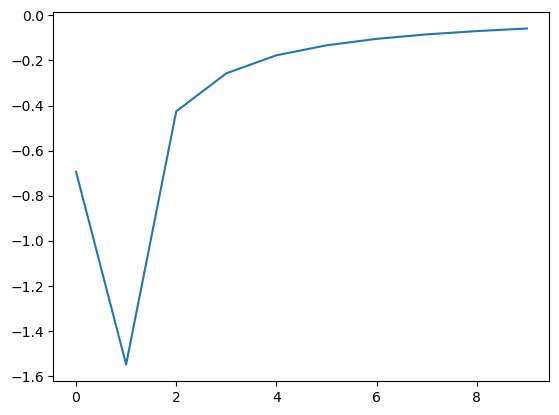

In [28]:
def loss(xw,y):
    yxw=y.reshape(-1)*xw.reshape(-1)
    lexw=np.log(1+np.exp(xw))
    return np.sum(yxw)-np.sum(lexw)
def grad(xw,y):
    py=1/(1+np.exp(-xw))
    g=x.T@(y.reshape(-1)-py.reshape(-1))
    return g
eta=0.1
p=x.shape[1]
w=np.zeros((p))
xw=x@w
l=loss(xw,y)
g=grad(xw,y)
print(xw.shape,y.shape,l,g.shape)
los=[]
for it in range(10):
    xw=x@w
    g=grad(xw,y)
    w=w+eta*g/n
    l=loss(xw,y)/n
    print(it,l)
    los.append(l)
plt.plot(los)